#CyberAttack Trends By Sector

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Importing necessary libraries
import kagglehub
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-cybersecurity-threats-2015-2024


In [ ]:
import os

# Correct path for Kaggle Notebooks
path = "/kaggle/input/global-cybersecurity-threats-2015-2024"

print("Files in dataset:", os.listdir(path))


Files in dataset: ['Global_Cybersecurity_Threats_2015-2024.csv']


In [ ]:
# Load dataset into pandas DataFrame
file_path = os.path.join(path, "Global_Cybersecurity_Threats_2015-2024.csv")
df = pd.read_csv(file_path)

In [ ]:
# Display shape of dataset (rows, columns)
print(df.shape)

(3000, 10)


In [ ]:
# Display first 5 rows of dataset
print(df.head())

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

In [ ]:
# Display dataset column names
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

#Columns say about
Country → The nation where the cyber incident was reported or occurred.

Year → The year in which the cyberattack took place.

Attack Type → The method or style of cyberattack (e.g., phishing, ransomware, DDoS).

Target Industry → The sector that was attacked (e.g., finance, healthcare, government).

Financial Loss (in Million $) → Estimated monetary damage caused by the incident.

Number of Affected Users → Count of people/customers impacted by the attack.

Attack Source → Where the attack originated (e.g., internal, external, unknown, specific country).

Security Vulnerability Type → The exploited weakness (e.g., weak passwords, unpatched software, misconfigurations).

Defense Mechanism Used → The cybersecurity measures applied in response (e.g., firewalls, AI monitoring, patching).

Incident Resolution Time (in Hours) → Time taken to contain and resolve the attack.

In [ ]:
# Display dataset info (dtypes, non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
# Separate numerical and categorical columns
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns
print(numerical_columns)
print(categorical_columns)

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)'],
      dtype='object')
Index(['Country', 'Attack Type', 'Target Industry', 'Attack Source',
       'Security Vulnerability Type', 'Defense Mechanism Used'],
      dtype='object')


In [ ]:
# Statistical summary of numerical columns
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
# Check for missing values
df.isna().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


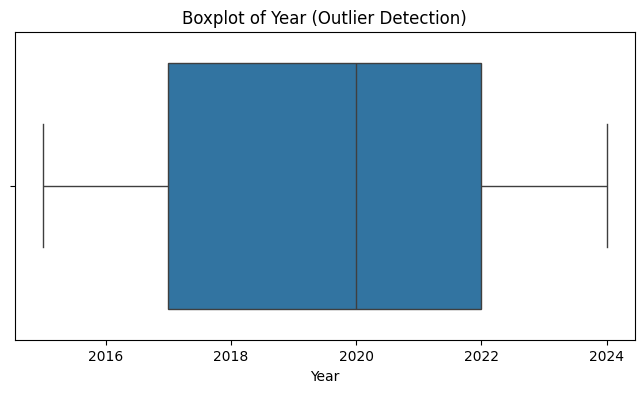

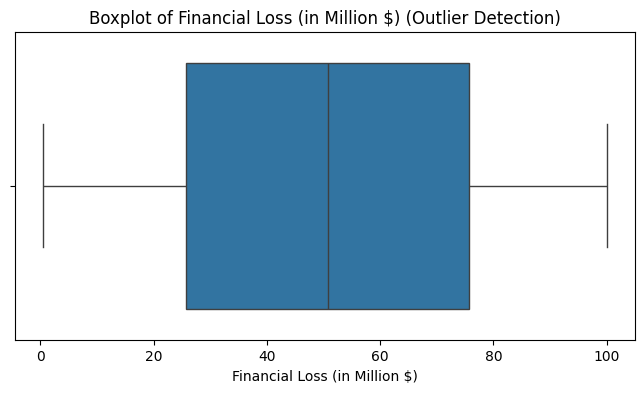

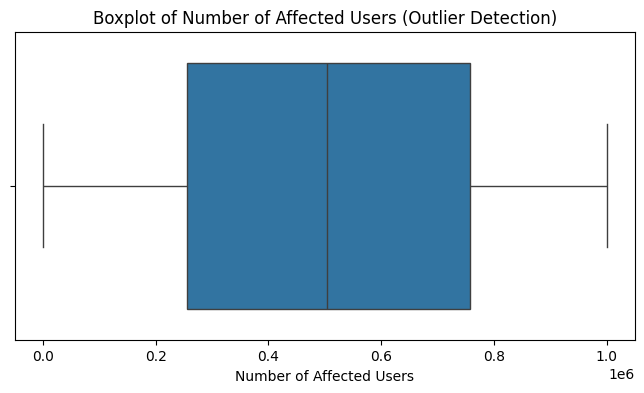

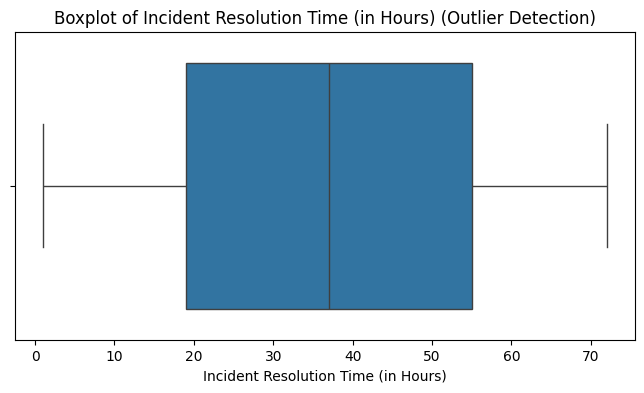

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

### Conclusion:
The boxplots highlight the presence of outliers in financial loss, affected users, and resolution time. This suggests extreme variations in certain incidents, indicating some attacks had disproportionately high impact.

#Univariate Analysis

/tmp/ipython-input-1945170539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="viridis")


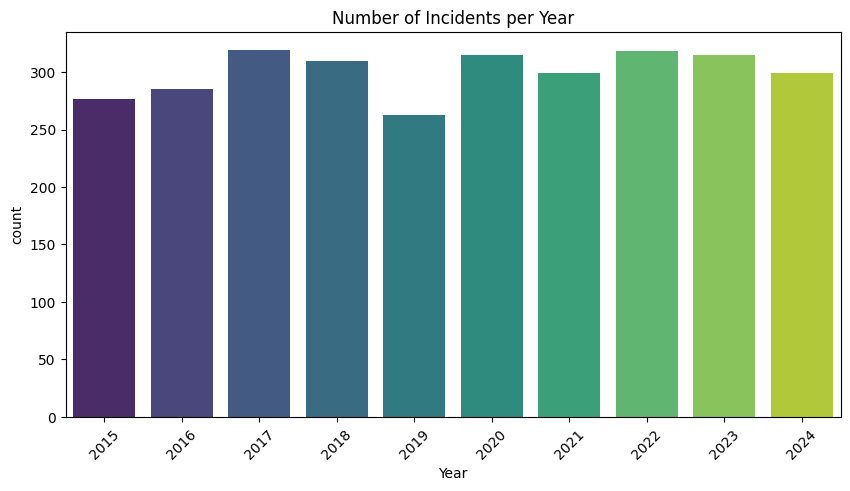

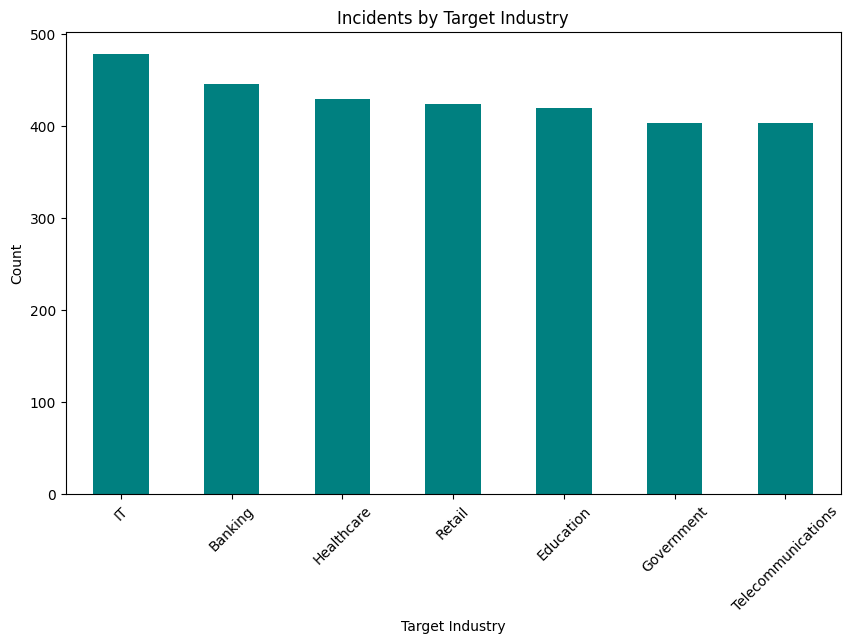

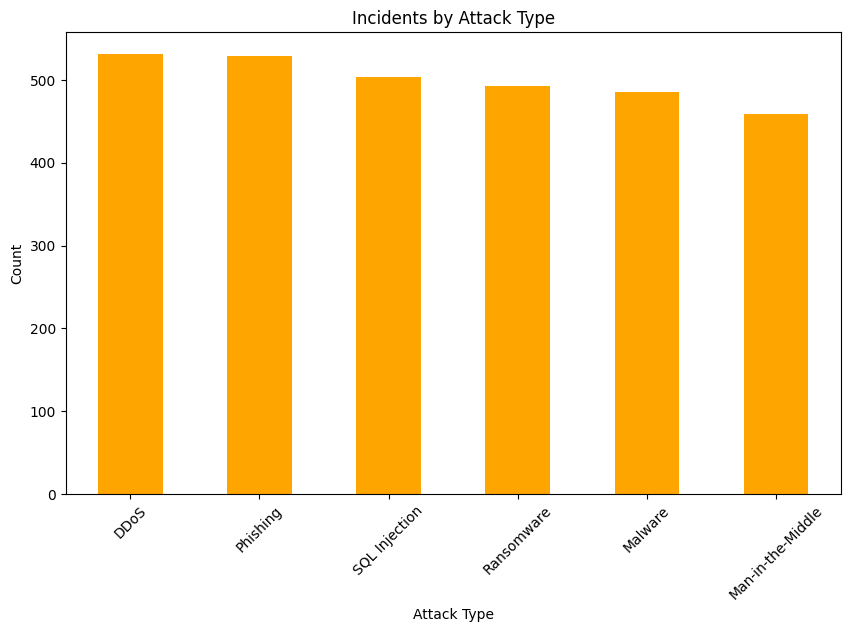

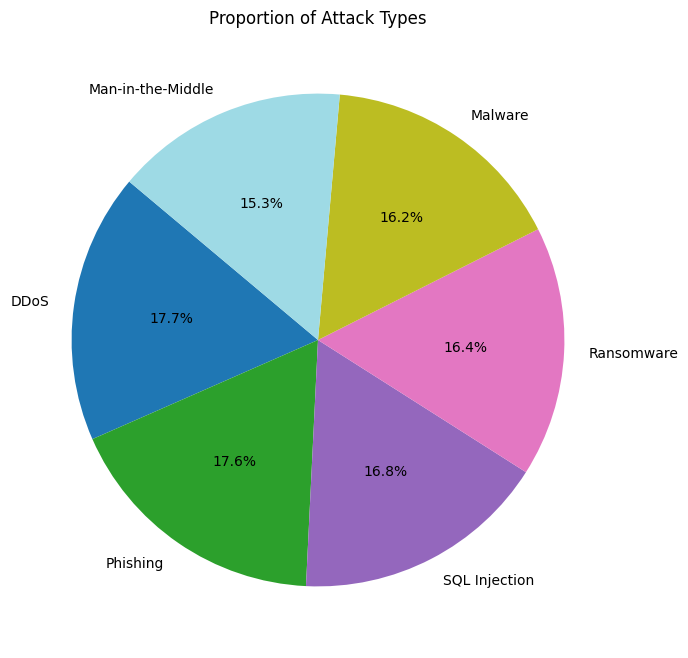

In [ ]:
# Univariate analysis (distribution of categorical/numerical features)
#No.of incidents
plt.figure(figsize=(10,5))
sns.countplot(x="Year", data=df, palette="viridis")
plt.title("Number of Incidents per Year")
plt.xticks(rotation=45)
plt.show()
#Distribution of Target Industry
plt.figure(figsize=(10,6))
df["Target Industry"].value_counts().plot(kind="bar", color="teal")
plt.title("Incidents by Target Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#Distribution of Attack Type
plt.figure(figsize=(10,6))
df["Attack Type"].value_counts().plot(kind="bar", color="orange")
plt.title("Incidents by Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#Pie chart for Attack Types (optional)
plt.figure(figsize=(8,8))
df["Attack Type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="tab20")
plt.title("Proportion of Attack Types")
plt.ylabel("")
plt.show()

#Outcome
#📊Pie Chart (Proportion of Attack Types)

DDoS: ~17.7%

Phishing: ~17.6%

SQL Injection: ~16.8%

Ransomware: ~16.4%

Malware: ~16.2%

Man-in-the-Middle: ~15.3%

👉 This shows that DDoS and Phishing attacks are slightly more common, while Man-in-the-Middle attacks are the least common among the recorded incidents.
#📊 Bar Chart (Incidents by Attack Type)

DDoS & Phishing have the highest number of incidents (around 530 each).

SQL Injection, Ransomware, Malware are in the middle (490–500 incidents).

Man-in-the-Middle has the lowest count (~460 incidents).

👉 This confirms the pie chart — DDoS and Phishing dominate, while Man-in-the-Middle is least frequent.

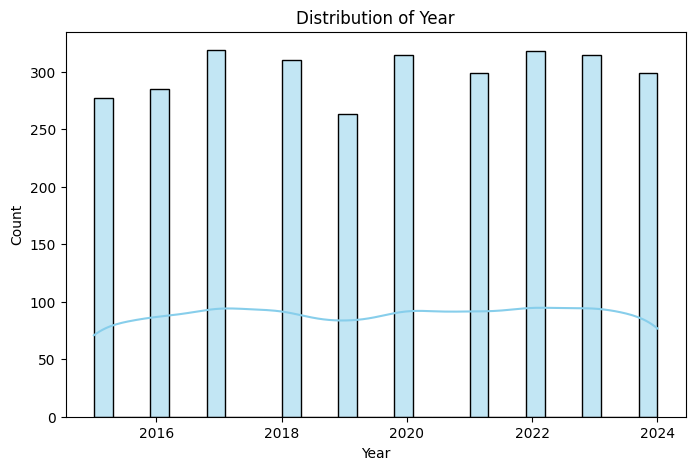

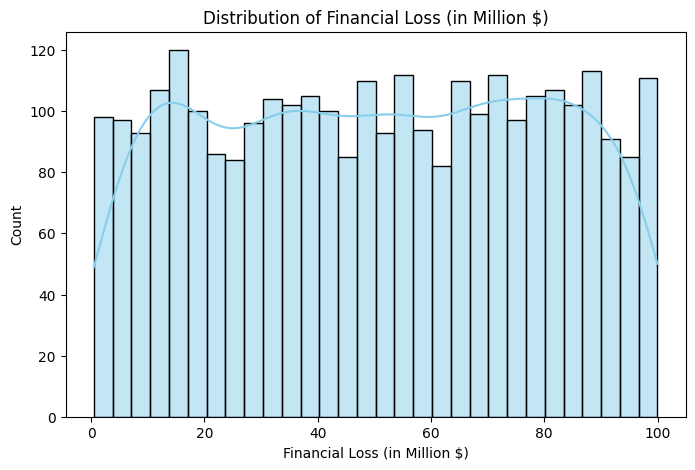

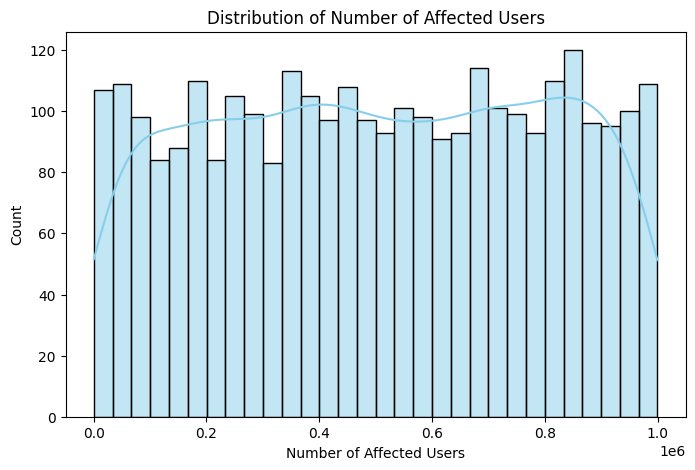

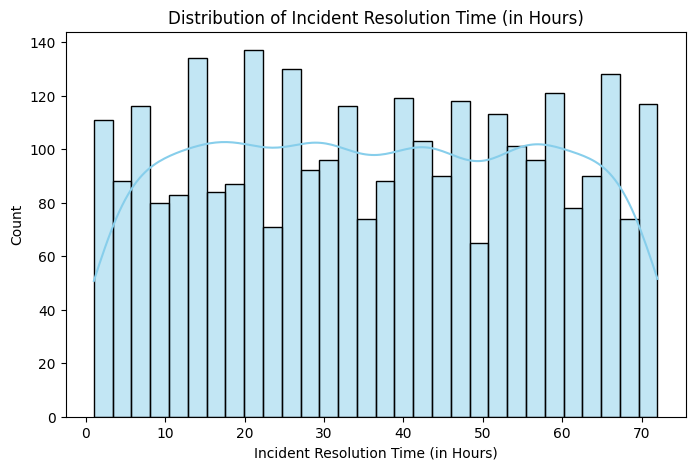

In [ ]:
# Univariate analysis (distribution of categorical/numerical features)
# Display dataset column names
for col in numerical_columns:
    if col in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {col}")
        plt.show()

#Bivariate Analysis

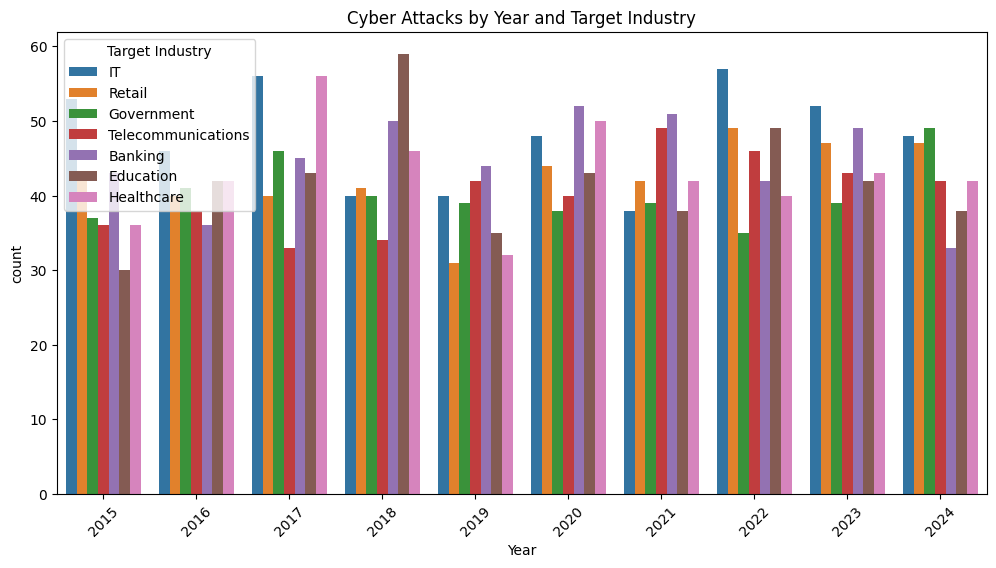

In [ ]:
# Countplot for categorical feature
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Year", hue="Target Industry")
plt.title("Cyber Attacks by Year and Target Industry")
plt.xticks(rotation=45)
plt.show()

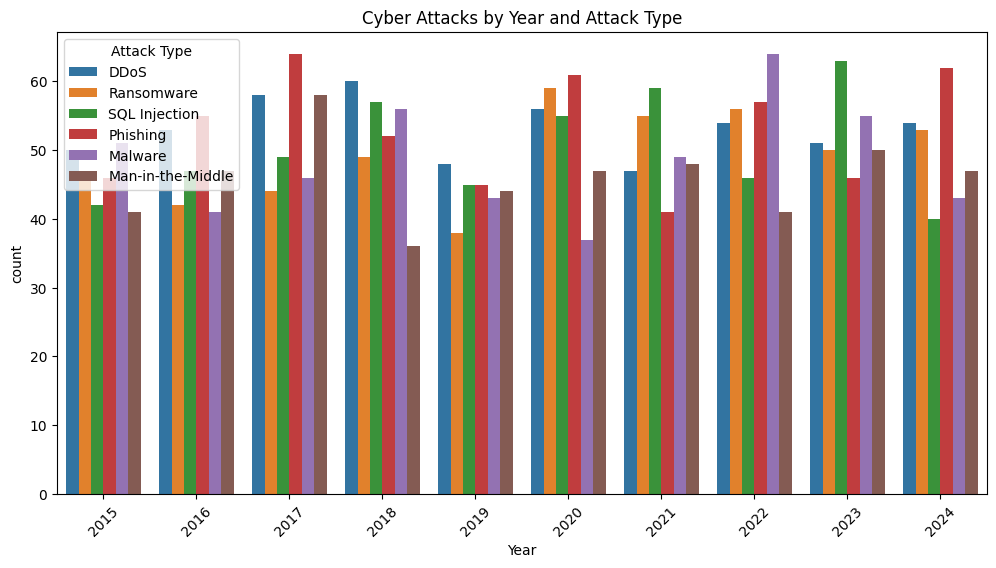

In [ ]:
# Countplot for categorical feature
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Year", hue="Attack Type")
plt.title("Cyber Attacks by Year and Attack Type")
plt.xticks(rotation=45)
plt.show()

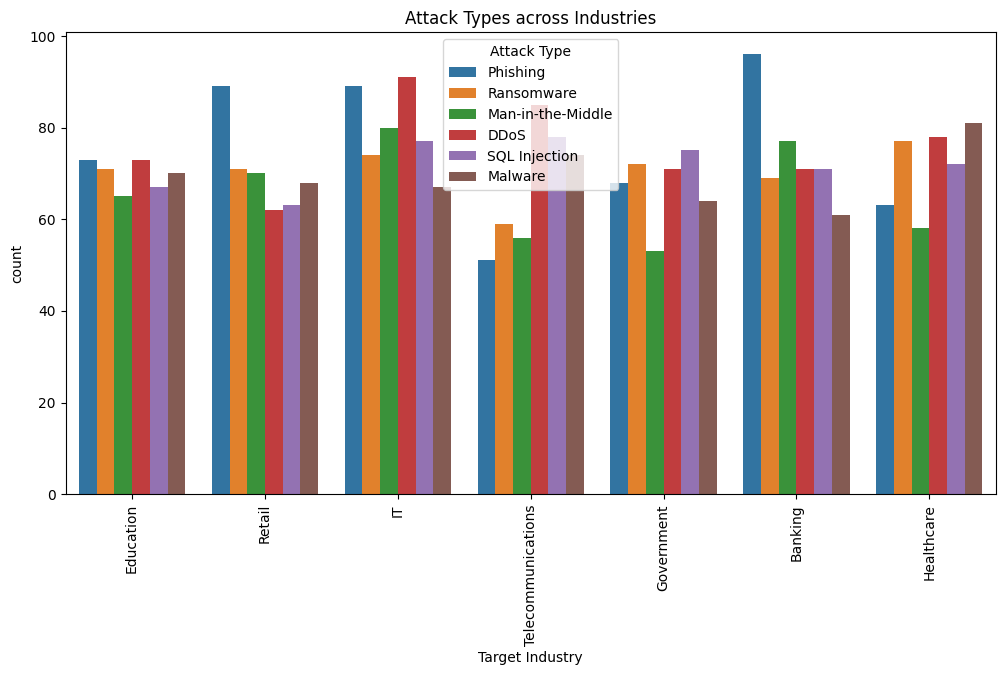

In [ ]:
# Countplot for categorical feature
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Target Industry", hue="Attack Type")
plt.title("Attack Types across Industries")
plt.xticks(rotation=90)
plt.show()

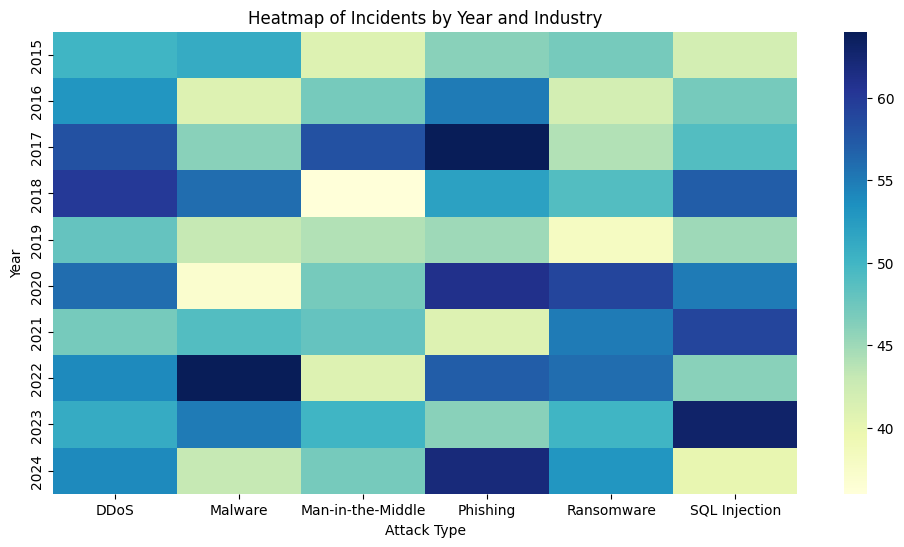

In [ ]:
# Correlation heatmap between numerical variables
cross_tab1 = pd.crosstab(df["Year"], df["Attack Type"])
plt.figure(figsize=(12,6))
sns.heatmap(cross_tab1, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Incidents by Year and Industry")
plt.show()

#Lets go for anaysis


In [ ]:
# Bivariate analysis using barplots
sector_year = df.groupby(["Year", "Target Industry"]).size().reset_index(name="Incident_Count")
print(sector_year.head())
print(sector_year.tail())

   Year Target Industry  Incident_Count
0  2015         Banking              43
1  2015       Education              30
2  2015      Government              37
3  2015      Healthcare              36
4  2015              IT              53
    Year     Target Industry  Incident_Count
65  2024          Government              49
66  2024          Healthcare              42
67  2024                  IT              48
68  2024              Retail              47
69  2024  Telecommunications              42


In [ ]:
# Univariate analysis (distribution of categorical/numerical features)
top_vectors = df["Attack Type"].value_counts()
print("Top Attack Vectors:")
print(top_vectors)

Top Attack Vectors:
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


📊 Frequency of attacks by sector & year (long format):
    Year     Target Industry  Incident_Count
4   2015                  IT              53
0   2015             Banking              43
5   2015              Retail              42
2   2015          Government              37
3   2015          Healthcare              36
6   2015  Telecommunications              36
1   2015           Education              30
11  2016                  IT              46
8   2016           Education              42
10  2016          Healthcare              42


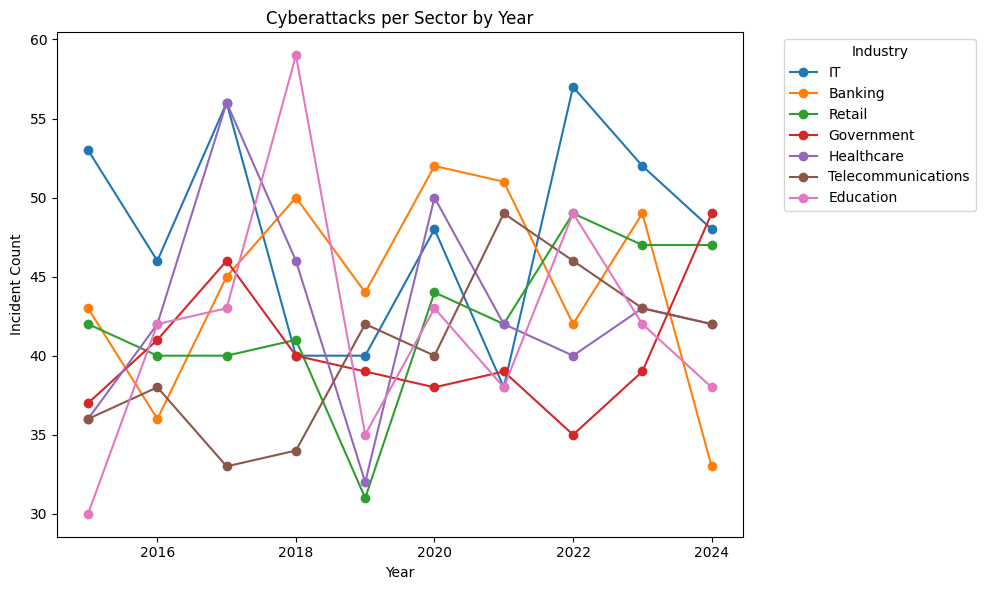

In [ ]:
# Bivariate analysis using barplots
# Group by Year and Industry
sector_year = (
    df.groupby(["Year", "Target Industry"])
      .size()
      .reset_index(name="Incident_Count")
      .sort_values(["Year", "Incident_Count"], ascending=[True, False])
)
print("📊 Frequency of attacks by sector & year (long format):")
print(sector_year.head(10))
plt.figure(figsize=(10,6))
for industry in sector_year["Target Industry"].unique():
    subset = sector_year[sector_year["Target Industry"] == industry]
    plt.plot(subset["Year"], subset["Incident_Count"], marker="o", label=industry)
plt.title("Cyberattacks per Sector by Year")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#Outcome:
The chart reveals that IT and Banking are the top targets, while Education and Healthcare show large fluctuations due to pandemic-related shifts. Government incidents are resurging in 2024, which signals the need for stronger national cybersecurity measures.
###Key Insights

Overall Trend:
Cyber incidents fluctuate but generally rise post-2020, coinciding with pandemic-driven digitization.

Most Affected Industries:
IT and Banking consistently report the highest number of incidents.

Pandemic Effect:
Peaks in 2020–2022 across sectors show that cybercriminals exploited digital expansion.

Sector-Specific Risks:

IT → DDoS & malware.

Banking → phishing, ransomware.

Healthcare → ransomware, malware.

Government → SQL injection, espionage.

Education → DDoS & phishing

In [ ]:
# Bivariate analysis using barplots
sector_vector_counts = (
    df.groupby(["Target Industry", "Attack Type"]).size().reset_index(name="Count")
)
top_vector_by_sector = (
    sector_vector_counts.loc[
        sector_vector_counts.groupby("Target Industry")["Count"].idxmax()
    ]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)
print("\n Top attack vector per sector:")
display(top_vector_by_sector)


 Top attack vector per sector:


,Target Industry,Attack Type,Count
0,Banking,Phishing,96
1,IT,DDoS,91
2,Retail,Phishing,89
3,Telecommunications,DDoS,85
4,Healthcare,Malware,81
5,Government,SQL Injection,75
6,Education,DDoS,73


### Conclusion:
The barplots illustrate relationships between attack type, industry, and financial losses. They suggest that while some industries face frequent attacks, others may suffer heavier financial damages even with fewer incidents.


 Top attack vector per sector:
      Target Industry    Attack Type  Count
0             Banking       Phishing     96
1                  IT           DDoS     91
2              Retail       Phishing     89
3  Telecommunications           DDoS     85
4          Healthcare        Malware     81
5          Government  SQL Injection     75
6           Education           DDoS     73


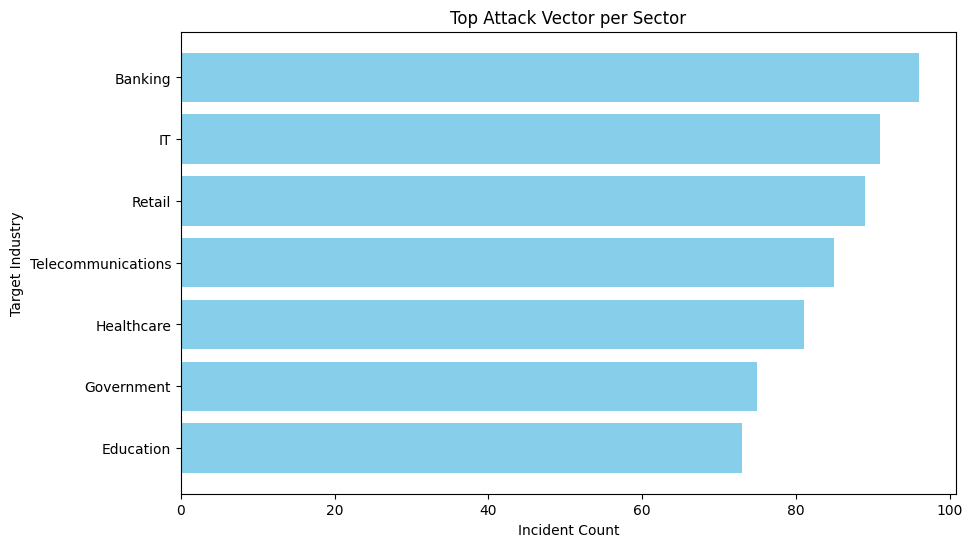

In [ ]:
# Bivariate analysis using barplots
sector_vector_counts = (
    df.groupby(["Target Industry", "Attack Type"])
      .size()
      .reset_index(name="Count")
)
top_vector_by_sector = (
    sector_vector_counts.loc[
        sector_vector_counts.groupby("Target Industry")["Count"].idxmax()
    ]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)
print("\n Top attack vector per sector:")
print(top_vector_by_sector)
plt.figure(figsize=(10,6))
plt.barh(
    top_vector_by_sector["Target Industry"],
    top_vector_by_sector["Count"],
    color="skyblue"
)
plt.xlabel("Incident Count")
plt.ylabel("Target Industry")
plt.title("Top Attack Vector per Sector")
plt.gca().invert_yaxis()
plt.show()

### Outcome:
Sector-Wise Comparison

Banking had the highest number of incidents → financial motivation is clear.

IT, Retail, and Telecom also highly targeted → focus on large-scale disruption.

Government and Education had relatively fewer but still significant incidents.

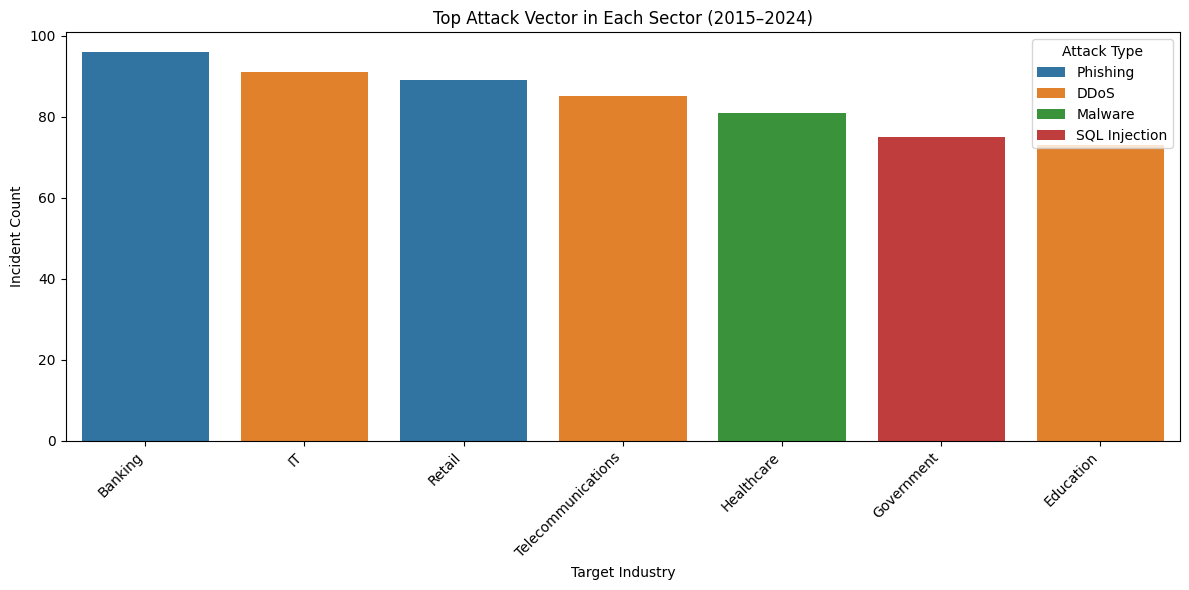

In [ ]:
# Bivariate analysis using barplots
plt.figure(figsize=(12,6))
sns.barplot(data=top_vector_by_sector, x="Target Industry", y="Count", hue="Attack Type", dodge=False)
plt.title("Top Attack Vector in Each Sector (2015–2024)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Incident Count")
plt.tight_layout()
plt.show()

#Outcome
Top Attack Vector in Each Sector

Banking & Retail: Phishing dominates → attackers exploit financial trust & credentials.

IT & Telecommunications: DDoS is the main threat → attackers aim for service disruption.

Healthcare: Malware is leading → targeting sensitive medical data.

Government: SQL Injection is a key threat → exploiting vulnerabilities in public systems.

Education: DDoS and Phishing are common → institutions with weaker defenses are targeted.

Files in dataset folder: ['Global_Cybersecurity_Threats_2015-2024.csv']
Detected CSV files: ['Global_Cybersecurity_Threats_2015-2024.csv']
Columns in dataset: Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


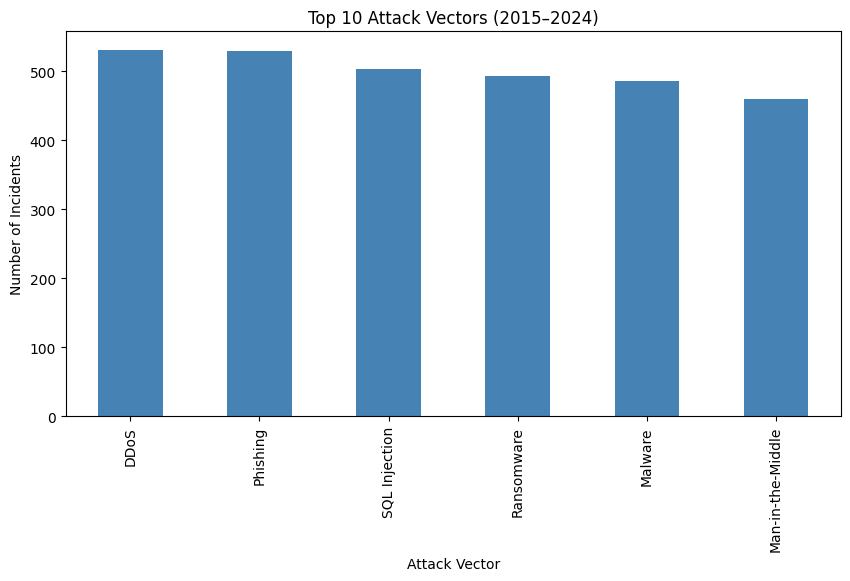

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Dataset path
path = "/kaggle/input/global-cybersecurity-threats-2015-2024"

# List all files to confirm
print("Files in dataset folder:", os.listdir(path))

# Auto-detect CSV file
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
print("Detected CSV files:", csv_files)

# Load the first CSV found
df = pd.read_csv(os.path.join(path, csv_files[0]))

# Check columns
print("Columns in dataset:", df.columns)

# Count top attack vectors (replace with exact column name)
top_vectors_overall = df["Attack Type"].value_counts()

# Plot
plt.figure(figsize=(10,5))
top_vectors_overall.head(10).plot(kind="bar", color="steelblue")
plt.title("Top 10 Attack Vectors (2015–2024)")
plt.ylabel("Number of Incidents")
plt.xlabel("Attack Vector")
plt.show()


#Outcome
Top 10 Attack Vectors (2015–2024)

DDoS and Phishing are the most dominant attack vectors overall.

SQL Injection, Ransomware, and Malware follow closely, showing that both network-based and application-level attacks are major threats.

Man-in-the-Middle attacks, though less frequent, are still notable.

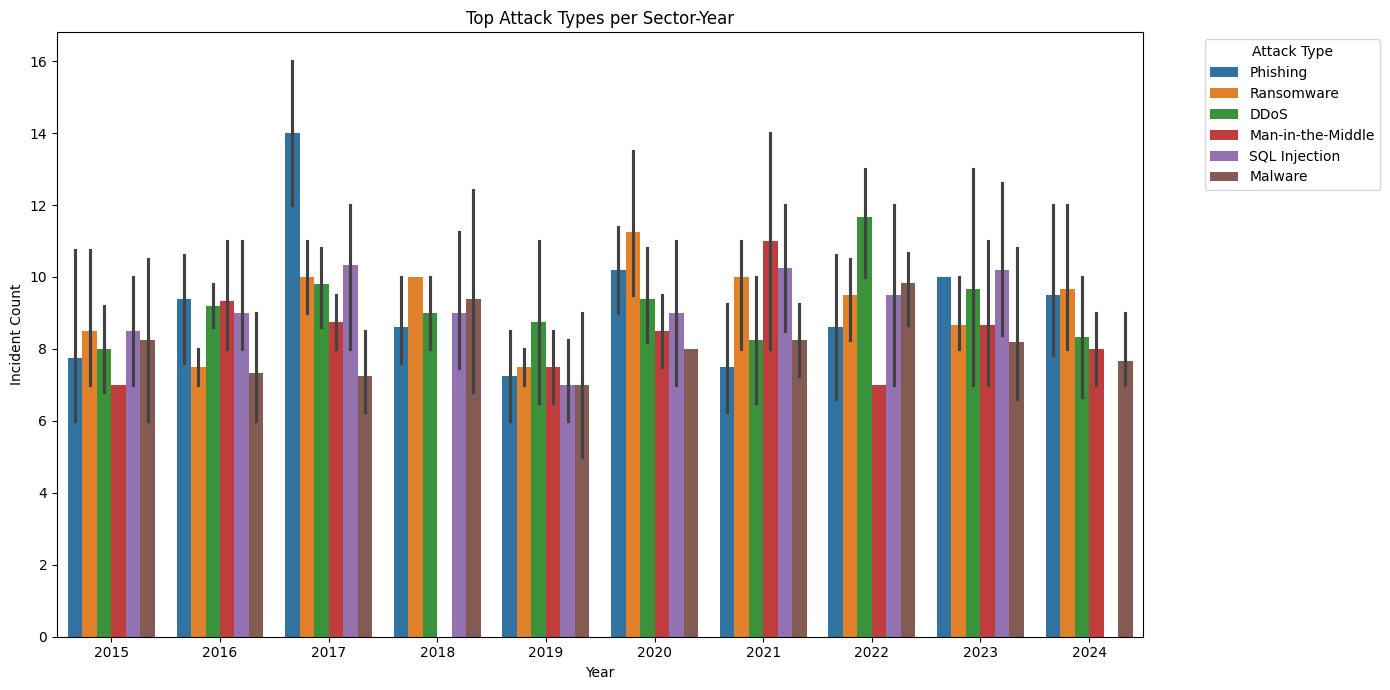

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create grouped dataframe
top_vector_by_sector_year = (
    df.groupby(["Year", "Attack Type", "Target Industry"])
      .size()
      .reset_index(name="Count")
)

# Step 2: (Optional) keep only top attack types per sector-year
top_vector_by_sector_year = (
    top_vector_by_sector_year
    .sort_values(["Year", "Target Industry", "Count"], ascending=[True, True, False])
    .groupby(["Year", "Target Industry"])
    .head(3)   # top 3 per sector-year (adjust if needed)
)

# Step 3: Plot
plt.figure(figsize=(14,7))
sns.barplot(
    data=top_vector_by_sector_year,
    x="Year",
    y="Count",
    hue="Attack Type"
)
plt.title("Top Attack Types per Sector-Year")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Outcomes:
Attack Types per Sector-Year (Barplot)

Every year, Phishing, DDoS, and Ransomware remain consistently high across industries.

The diversity of attack vectors per year shows attackers adapt strategies instead of sticking to one method.

Peaks of Ransomware in 2020–2021 match global ransomware campaigns (e.g., WannaCry, Ryuk, Conti).

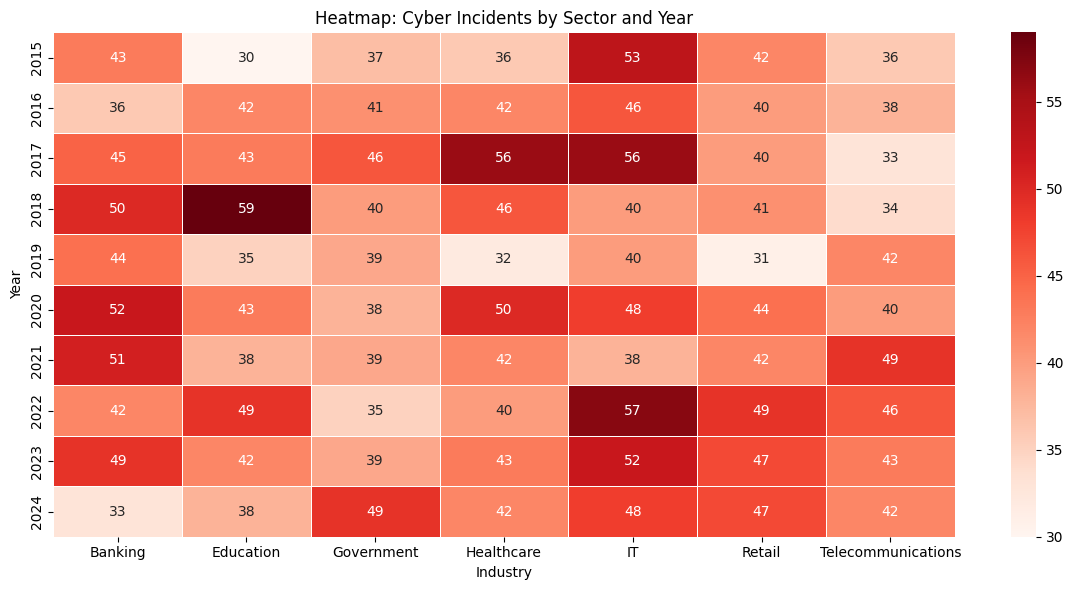

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group incidents by Year & Target Industry
sector_year = (
    df.groupby(["Year", "Target Industry"])
      .size()
      .reset_index(name="Count")
)

# Step 2: Pivot for heatmap (Industries as columns, Years as rows)
sector_year_pivot = sector_year.pivot(index="Year", columns="Target Industry", values="Count").fillna(0)

# Step 3: Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(sector_year_pivot, cmap="Reds", linewidths=0.5, annot=True, fmt="g")
plt.title("Heatmap: Cyber Incidents by Sector and Year")
plt.xlabel("Industry")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


#Outcomes:
 Heatmap: Cyber Incidents by Sector and Year

IT, Banking, and Education sectors consistently face higher incidents compared to others.

2018 and 2020 saw spikes across multiple industries (Education, Banking, IT), indicating major global cybercrime waves.

Healthcare faced a significant rise in 2017 and 2020, likely due to ransomware targeting sensitive patient data.

#✅ Overall Conclusion

The analysis of cyber incidents from 2015 to 2024 reveals that cybersecurity threats are persistent across all industries, with notable fluctuations over time. Industries such as IT, Education, and Banking frequently report higher incident counts, indicating their critical role as prime targets due to valuable data and services.

When analyzing by attack type, it is evident that DDoS and Phishing attacks dominate, together accounting for the largest share of incidents. SQL Injection, Ransomware, and Malware also pose substantial threats, whereas Man-in-the-Middle attacks, though less common, remain significant in the overall threat landscape.

In summary, the data highlights that organizations across sectors must prioritize robust defenses against DDoS and Phishing, while not neglecting other attack vectors. The overall trend emphasizes the need for continuous monitoring, stronger access controls, employee awareness programs, and adaptive cybersecurity strategies to mitigate the evolving risks in the digital era.
Phishing & DDoS are the most persistent global threats across all industries.

Sector-specific vulnerabilities exist (Healthcare → Malware, Government → SQL Injection).

Peaks in 2017, 2018, and 2020 align with major global cyberattack campaigns.

Organizations must adopt multi-layered defenses:

Banking → Strong anti-phishing & MFA.

IT/Telecom → DDoS mitigation tools.

Healthcare → Malware & ransomware protection.

Government → Secure coding & database protection.
